# Física Computacional. Tarea 1b.
$\text{Atzin López Tercero} $

$\text{Hecho en Python}$

In [1]:
#importamos las paqueterías necesarias
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import array
from numpy import *
import math
import time

1. Con el método de diferencias finitas hemos visto como calcular la derivada despreciando términos mayores o iguales a $h^5$. Utilizando esa misma técnica, obtenga una relación que proporcione directamente la segunda derivada despreciando términos mayores o iguales a $h^5$. De esta manera hay dos maneras de obtener la segunda derivada numérica de una función, una es aplicando dos veces la funcién de primera derivada y la otra es utilizando la relación para la segunda derivada directamente. La pregunta es si estos dos procesos ¿Son equivalentes?. Para responder a ello, utilice la siguiente función.

$$
f(x)=\frac{sin^2(5x)}{x^2+1},
$$

obtenga su segunda derivada analítica, y compare las dos técnicas anteriores con la solución analítica. Al menos obtenga una precisióon de $10^{−4}$¿Tienen la misma precisipon?, si la respuesta es no, ¿Cuál es mejor y por qué?.


Primero vamos a generar un algoritmo para calcular la primer derivada despreciando términos mayores o iguales a $h^5$, entonces, en las [notas del curso](http://sistemas.fciencias.unam.mx/~rich/FisComp/) se generó una forma de derivar una expresión de la derivada de $f(x)$ donde se desprecian términos de orden $h^5$ en adelante. Esto implica tener que hacer operaciones con dos puntos a la izquierda y dos a la derecha para una expresión simétrica. Esta expresión es:

$f'(x_i)=\frac{1}{12h}\left( -f(x_{i+2})+8f(x_{i+1})-8f(x_{i-1})+f(x_{i-2})\right)$

Los puntos extremos se calculan de manera asimétrica con la siguiente expresión:

$f'(x_i)=\frac{1}{h}\left(-\frac{25}{12}f(x_i)+4f(x_{i+1})-3f(x_{i+2})+\frac{4}{3}f(x_{i+3})-\frac{1}{4}f(x_{i+4})\right)$

Notemos que para el lado izquierdo tenemos que sustituir $i=0,1$ y del lado derecho cambiar $i+1 \rightarrow i-1$, $i+2 \rightarrow i-2$, $i+3 \rightarrow i-3$, $i+4 \rightarrow i-4$ y tambien $h \rightarrow -h$. Este último caso se utiliza para $i=N,N-1$.

En la siguiente celda se hace la programación de este algoritmo:

In [2]:
#Definimos la primer derivada despreciando los términos de orden mayores a 4 para una función f cuya malla es uniforme.
def deriv(f,x):
    f_prima = zeros(len(f)) 
    #Definimos el espacio entre dos puntos contiguos en la malla
    h=x[1]-x[0]
    for i in range (2,len(f)-2):
        f_prima[i]=(-f[i+2]+8*f[i+1]-8*f[i-1]+f[i-2])/(12*h)
    
       #Calculamos los puntos frontera a la izquierda
        f_prima[0] = (-(25/12)*f[0]+4*f[1]-3*f[2]+(4/3)*f[3]-(1/4)*f[4])/(h) #Primer punto 
        f_prima[1] = (-(25/12)*f[1]+4*f[2]-3*f[3]+(4/3)*f[4]-(1/4)*f[5])/(h) #Segundo punto
        
        #Calculando los puntos para frontera a la derecha
        f_prima[-1]=-(-(25/12)*f[-1]+4*f[-2]-3*f[-3]+(4/3)*f[-4]-(1/4)*f[-5])/(h) #Último punto N
        f_prima[-2]=-(-(25/12)*f[-2]+4*f[-3]-3*f[-4]+(4/3)*f[-5]-(1/4)*f[-6])/(h) #Penúltimo punto N-1
    return f_prima

Ahora vamos a calcular la primer derivada de 

$$
f(x)=\frac{sin^2(5x)}{x^2+1}.
$$

Para ver que el algoritmo funcione bien, vamos a comparar el resultado con el de sus primeras dos derivadas analíticas y su integral:

$$
f'(x)=\frac{2\sin(5x)(5(x^2+1)\cos(5x)-x\sin(5x))}{(x^2+1)^2}
$$

y

$$
f''(x)=-\frac{2((25x^4+47x^2+26)\sin^2(5x)+(20x^2+20x)\cos(5x)\sin(5x)+(-25x^4-50x^2-25)\cos^2(5x))}{(x^2+1)^3}
$$


La derivada de f(x) es:  [ 1.05632177e-14  1.55233691e-04  3.10485307e-04 ... -3.10485307e-04
 -1.55233691e-04 -7.92919318e-15]


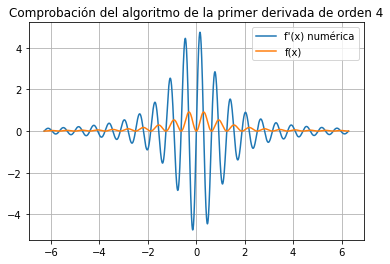

In [3]:
#Comprobando que la función anterior se aproxima a la primer derivada derivada 
#Escogemos la malla uniforme
x = linspace(-2*pi,2*pi,100000)
#Definimos la función a la que le vamos a calcular la primer derivada
y =(sin(5*x)*sin(5*x))/(x*x+1)
y_num_deriv= deriv(y,x)
title("Comprobación del algoritmo de la primer derivada de orden 4")
plot(x,y_num_deriv, '-', label="f'(x) numérica")
plot(x,y, '-', label="f(x)")
print('La derivada de f(x) es: ',deriv(y,x))
legend(),grid()
show()

Graficamos la derivada analítica para corroborar que la derivada numerica se aproxima adecuadamente:

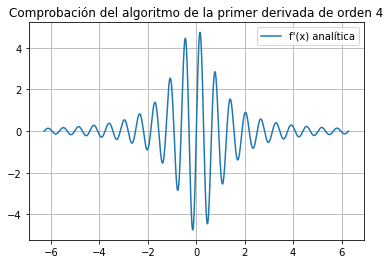

In [4]:
#Escogemos la malla uniforme
x = linspace(-2*pi,2*pi,100000)
#Escogemos la función de prueba a la que le vamos a calcular la primer derivada
y_ana =(2*sin(5*x)*(5*(x**2+1)*cos(5*x)-x*sin(5*x)))/((x**2+1)**2)
title("Comprobación del algoritmo de la primer derivada de orden 4")
plot(x,y_ana, '-', label="f'(x) analítica")
legend(),grid()
show()

Ahora si vamos a calcular la segunda derivada numérica aplicando dos veces la función de primera que ya programamos para la primer derivada:

El tiempo de ejecución de la primera derivada es:  0.5760159492492676 s


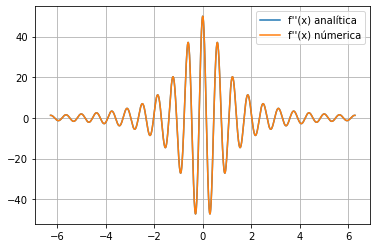

Error de la segunda derivada de orden 4 = 1.5912430129105815e-07


In [5]:
#Segunda derivada analítica
y2_ana=2*(25*(x**6)*cos(10*x)+75*(x**4)*cos(10*x)+75*(x**2)*cos(10*x)-10*(x**5)*sin(10*x)-20*(x**3)*sin(10*x)-10*sin(10*x)*x+3*sin(5*x)**2*(x**4)+2*(x**2)*sin(5*x)**2-sin(5*x)**2+25*cos(10*x))/((x**2+1)**4)
inicio = time.time()
#Aplicamos el algoritmo nuevamente 
y_num_deriv2=deriv(y_num_deriv,x)
#terminamos de contar el tiempo
fin = time.time()
#Restamos el tiempo inicial y el tiempo final para obtener
#el tiempo de ejecución
t_i = fin - inicio 
#Le pedimos al programa que nos imprima el tiempo de ejecución
print("El tiempo de ejecución de la primera derivada es: ",t_i,"s")
#Graficamos ambas derivadas
plot(x,y2_ana,label="f''(x) analítica")
plot(x,y_num_deriv2,label="f''(x) númerica")
legend(),grid()
show()
#Imprimimos el máximo error entre puntos
print("Error de la segunda derivada de orden 4 =" ,
      max(abs(y2_ana-y_num_deriv2)) )

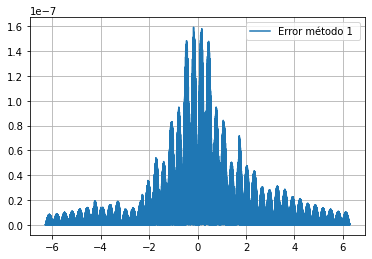

In [6]:
x = linspace(-2*pi,2*pi,100000)
error1 = zeros(len(x))
for i in range(len(x)):
  error1[i] = abs(y2_ana[i]-y_num_deriv2[i])
plot(x, error1, label = 'Error método 1 ')
legend(),grid()
show()

Podemos observar que el error del primer método tiene un orden de $1.6x10^{-7}$.

Ahora vamos a obtener la segunda derivada de una función en el punto $x_i$ con una precisión en la que se desprecian términos en $h^5$, es decir, tenemos que realizar operaciones con dos puntos a la izquierda y dos a la derecha para una expresión simétrica (orden 4). Los puntos van a estar siempre separados por una distancia h porque se trata de una malla uniforme.
Por lo tanto, partimos de las siguientes ecuaciones (expansiones en serie de Taylor):

$$
f(x_0+h)=f(x_0)+f'(x_0)h+\frac{f''(x_0)h^2}{2}+\frac{f'''(x_0)h^3}{3!}+\frac{f^{iv}(x_0)h^4}{4!}+O(h^5) \hspace{0.5cm} (1)
$$

$$
f(x_0-h)=f(x_0)-f'(x_0)h+\frac{f''(x_0)h^2}{2}-\frac{f'''(x_0)h^3}{3!}+\frac{f^{iv}(x_0)h^4}{4!}+O(h^5) \hspace{0.5cm} (2)
$$

$$
f(x_0+2h)=f(x_0)+2f'(x_0)h+2f''(x_0)h^2+\frac{4f'''(x_0)h^3}{3}+\frac{2f^{iv}(x_0)h^4}{3}+O(h^5) \hspace{0.5cm} (3)
$$

$$
f(x_0-2h)=f(x_0)-2f'(x_0)h+2f''(x_0)h^2-\frac{4f'''(x_0)h^3}{3}+\frac{2f^{iv}(x_0)h^4}{3}+O(h^5) \hspace{0.5cm} (4)
$$

Sumamos las ecuaciones $(1)-(2)$ y $(3)-(4)$ y obtenemos lo siguiente:

$$
f(x_0+h)+f(x_0-h)=2f(x_0)+f''(x_0)h^2+\frac{1}{12}f^{iv}(x_0)h^4+O(h^5) \hspace{0.5cm} (5) 
$$

$$
f(x_0+2h)+f(x_0-2h)=2f(x_0)+4f''(x_0)h^2+\frac{4}{3}f^{iv}(x_0)h^4+O(h^5) \hspace{0.5cm} (6) 
$$

Así, podemos hacer $16(5)-(6)$:

$$
16f_{i+1}+16f_{i-1}-f_{i+2}=30f_i+12f''_ih^2
$$

Por lo que, la expresión para la segunda derivada numérica de orden 4 en una malla uniforme es:

$$
f''(x_i)=\frac{1}{12h^2}\left(16f_{i+1}+16f_{i-1}-f_{i+2}-30f_i   \right)
$$

Observamos que la expresión anterior no puede ser aplicada en los puntos extremos y que se ha tomado $h=x_i+1−x_i$, por lo cual hay que notar que la expresión anterior hace uso del hecho de que se tienen puntos a la derecha y a la izquiera de $x_0$, por lo cual la expresión anterior no se vale en los puntos frontera. Entonces obtengamos la derivada en los puntos frontera.

Veamos el caso de la frontera izquierda, para esto, usaremos los h, 2h, 3h, 4h es decir nos estamos tomando los puntos a la derecha. Realizando las expansiones en serie de Taylor correspondiente, despresiando terminos h5, se obtiene: Para calcular la derivada en los extremos necesitamos las expresiones para $x_0+h$ , $x_0+2h$, $x_0+3h$ y $x_0+4h$. Estas expresiones podemos escribirlas como el siguiente sistema de ecuaciones:

$$
\begin{bmatrix}
1 & 1/2! & 1/3! & 1/4! \\
2 & 2 & 4/3 & 2/3 \\
3 & 9/2 & 9/2 & 27/8 \\
4 & 8 & 32/3 & 32/3
\end{bmatrix}
\begin{bmatrix}
hf'_1 \\
h^2f''_i \\
h^3f'''_i \\
h^4 f^{iv}
\end{bmatrix}
=
\begin{bmatrix}
f_{i+1}-f_i \\
f_{i+2}-f_i \\
f_{i+3}-f_i \\
f_{i+4}-f_i
\end{bmatrix}
$$

Por lo tanto, la solución para $f′′_i$ es la solución del segundo nivel y es la siguiente:

$$
f''(x_i)=\frac{\frac{35}{12}f_i-\frac{26}{3}f_{i+1}+\frac{19}{2}f_{i+2}-\frac{14}{3}f_{i+3}+\frac{11}{12}f_{i+4}}{h^2}
$$

Lo cual es equivalente a:

$$
f''(x_i)=\frac{-104f_{i+1}+114f_{i+2}-56f_{i+3}+11f_{i+4}+35f_i}{12h^2}
$$

Para el primer punto se evalúa en $i=1$ y para el último en $i=$end, considerando que:

$i+1\rightarrow i−1$,$i+2 \rightarrow i−2$,$i+3 \rightarrow i−3$,$i+4 \rightarrow i−4$ y $h \rightarrow -h$.

A continuación, procedemos a programar este algoritmo.

In [7]:
#Definimos la segunda derivada de orden 4 para una función f cuya malla es uniforme.
def deriv4(f,x):
    f_prima1 = zeros(len(f))
    h=x[1]-x[0]
   
    for i in range (2,len(f)-2):
        f_prima1[i]=(16*f[i+1]+16*f[i-1]-f[i+2]-f[i-2]-30*f[i])/(12*h*h)
    
       #Calculamos los puntos frontera a la izquierda
        f_prima1[0] = (-(26/3)*f[1]+(19/2)*f[2]-(14/3)*f[3]+(11/12)*f[4]+(35/12)*f[0])/(h*h)
        f_prima1[1] = (-(26/3)*f[2]+(19/2)*f[3]-(14/3)*f[4]+(11/12)*f[5]+(35/12)*f[1])/(h*h)
        
        #Calculando los puntos para frontera a la derecha
        f_prima1[-2]=((-26/3)*f[-3]+(19/2)*f[-4]-(14/3)*f[-5]+(11/12)*f[-6]+(35/12)*f[-2])/(h*h)
        f_prima1[-1]=((-26/3)*f[-2]+(19/2)*f[-3]-(14/3)*f[-4]+(11/12)*f[-5]+(35/12)*f[-1])/(h*h)
    return f_prima1

Ahora podemos obtener la segunda derivada de $f(x)$ con o la relación para la segunda derivada directamente:

El tiempo de ejecución de la segunda derivada es:  0.5386505126953125 s


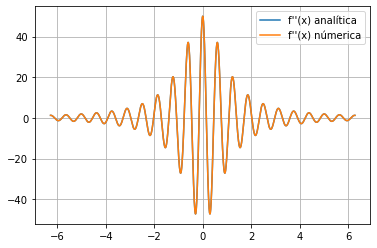

Error de la segunda derivada de orden 4 = 3.773060139877771e-07


In [8]:
#Escogemos la malla uniforme
x = linspace(-2*pi,2*pi,100000)
#Nuestra función
y =(sin(5*x)*sin(5*x))/(x*x+1)
#Segunda derivada analítica
y2_ana==2*(25*(x**6)*cos(10*x)+75*(x**4)*cos(10*x)+75*(x**2)*cos(10*x)-10*(x**5)*sin(10*x)-20*(x**3)*sin(10*x)-10*sin(10*x)*x+3*sin(5*x)**2*(x**4)+2*(x**2)*sin(5*x)**2-sin(5*x)**2+25*cos(10*x))/((x**2+1)**4)
inicio = time.time()
#Aplicamos el algoritmo nuevamente 
y_num_deriv22=deriv4(y,x)
#terminamos de contar el tiempo
fin = time.time()
#Restamos el tiempo inicial y el tiempo final para obtener
#el tiempo de ejecución
t_i = fin - inicio 
#Le pedimos al programa que nos imprima el tiempo de ejecución
print("El tiempo de ejecución de la segunda derivada es: ",t_i,"s")
#Graficamos ambas derivadas
plot(x,y2_ana,label="f''(x) analítica")
plot(x,y_num_deriv22,label="f''(x) númerica")
legend(),grid()
show()
#Imprimimos el máximo error entre puntos
print("Error de la segunda derivada de orden 4 =" ,
      max(abs(y2_ana-y_num_deriv22)) )

In [9]:
a=1.5912430129105815e-07
b=3.773060139877771e-07
a-b

-2.1818171269671893e-07

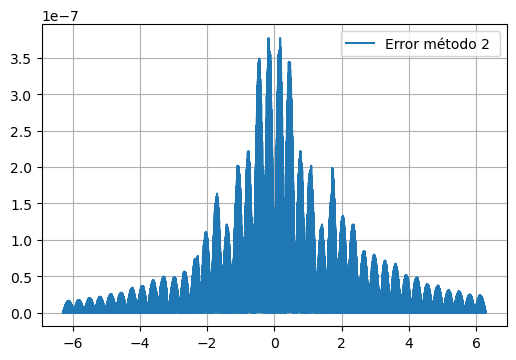

In [10]:
x = linspace(-2*pi,2*pi,100000)
error2 = zeros(len(x))
figure(dpi=100)
for i in range(len(x)):
  error2[i] = abs(y2_ana[i]-y_num_deriv22[i])
plot(x, error2, label = 'Error método 2 ')
legend(),grid()
show()

Como se puede apreciar, el cálculo de la segunda derivada con esta última función, que es nuestro método 2, es mucho menos precisa, tiene un error de un orden de $3.5x10^{-7}$. Veamos la comparación entre las dos funciones anteriores que se programaron en las celdas de arriba.

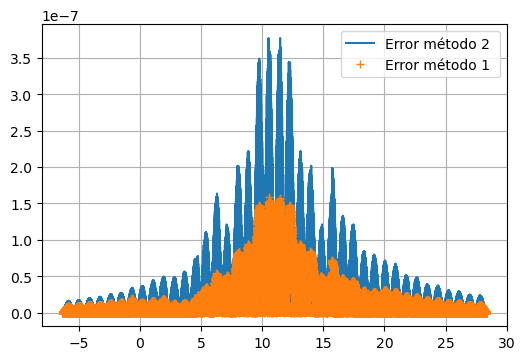

In [11]:
x = linspace(-2*pi,9*pi,100000)
error2 = zeros(len(x))
figure(dpi=100)
for i in range(len(x)):
  error2[i] = abs(y_num_deriv22[i]-y2_ana[i])
plot(x, error2, '-', label = 'Error método 2 ')
error1 = zeros(len(x))
for i in range(len(x)):
  error1[i] = abs(y_num_deriv2[i]-y2_ana[i])
plot(x, error1 ,'+',label = 'Error método 1 ')
legend(),grid()
show()

Ahora, ¿Tienen la misma precisión?, si la respuesta es no, ¿Cuál es mejor y por qué?

No tienen la misma presición, entonces, de este experimento númerico podemos concluir que a más puntos le anexemos a la malla, mayor será el tiempo de ejecución, pero también necesitamos más puntos si queremos más presición en al cálculo; en ésto, el método aplicando dos veces la función de primera derivada tiene un eror de $1.5912430129105815e^{-07}$ y el método de usar la relación para la segunda derivada directamente tiene un margen de error de $ 3.773060139877771e^{-07}$ con una malla de $100000$, entonces el método de aplicar dos veces el algoritmo de primer derivada es más precisa por $2.1818171269671893e^{-07}$ ordenes de magnitud. 

También, al momento de graficar el error refinando la mallaa a $100000$ puntos, podemos observar (aunque muy tenuemente que el método de aplicar dos veces la relación para la primer derivada posee claramente menor error. Veamos que en el método de aplicar dos veces la función tiene un tiempo de ejecución $t_1=2.071476697921753 s$, un tiempo menor que el del segundo con un tiempo de ejecución de $t_2= 2.0224521160125732 s$. Además, en el proceso de obtener las mallas adecuadas para que se cumpliera la condición pedida en el ejercicio, se aprecio que anexarle más puntos a la malla, no siempre nos genera una buena aproximación. 

Además, de que se debe escoger cuidadosamente la función con la cual se obtendrán las derivadas, ya que escoger la función correcta nos provocará que nuestra malla posea menos puntos y de esta manera el tiempo de ejecución sea menor. Así, el método de utilizar la funcion de primer derivada dos veces es el más óptimo, ¿por qué? porque un algoritmo puede ser valorado de acuerdo con varios criterios, uno de los más importantes es el tiempo que tarda en ejecutarse. Hay también, distintos aspectos dentro del criterio que controla el tiempo, uno de ellos, puede ser el tiempo de ejecución requerido por distintos algoritmos para la resolución de un mismo problema en un ordenador concreto, lo que lo vuelve un criterio empírico relacionado con el programa y la máquina utilizada en la implementación del algoritmo. 


En la práctica tratamos de elegir valores de $h$ que no sean ni demasiado grandes ni demasiado pequeños, y solo una cierta familiaridad con el problema nos permite elegirlos de esa manera. Nótese que dependiendo del problema que estemos tratando un mismo número puede considerarse “grande” o “pequeño”  (por ejemplo, 10 segundos en el movimiento de la Tierra al rededor del Sol es un tiempo extremadamente pequeño, pero 10 segundos para un objeto en caída libre en la superficie de la Luna es un tiempo bastante grande), entonces usando la fórmula del método uno la situación mejora pero solo un poco. 

Entonces concluimos que el mejor método es el de aplicar la primer derivada dos veces.

2.Genere una función que realice la integral en un intervalo cerrado. Para ello utilice las siguientes dos
relaciones:

(a) Función Simp_3_8: $\int_{x_0}^{x_3} f(x)dx=\frac{3h}{8}(f_0+3f_1+3f_2+f_3)$

(b) Función Bode: $\int_{x_0}^{x_4} f(x)dx=\frac{2h}{45}(7f_0+32f_1+12f_2+32f_3+7f_4)$

En este caso la función tendrá que recibir los límites de integración de la función a integrar y la partición
se deberá realizar de acuerdo a una precisión deseada, que por defecto deberá ser $10^{−4}$. Note que en el caso las particiones deberán ser múltiplos de 3 o 4 dependiendo del algoritmo a utilizar. Verifique que estas funciones trabajan correctamente con $\int^\pi_0 \sin(x)dx=2$ y $\int_0^1 e^xdx=1.718282$

Vamos a definir el algoritmo para calcular la integral de simpson para $e^x$:

In [12]:
#Definimos la función que nos calcule la integral de Simpson
def intSimpson(x_1,x_2,particion):
    N=3*particion
    x_f=linspace(x_1,x_2,N+1)
    #Definimos el espacio entre dos puntos contiguos en la malla
    h=x_f[1]-x_f[0]
    f_x=zeros(len(x_f))
    for i in range(len(f_x)):
              f_x[i]=e**x_f[i]
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integralf_x = 0 
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 3 puntos
    for i in range(0,N-1,3):
        integralf_x += (f_x[i]+3*f_x[i+1]+3*f_x[i+2]+f_x[i+3])*(3*h/8)
    return integralf_x        

Vamos a definir el algoritmo para calcular la integral de simpson para $sin(x)$:

In [13]:
print("La integral de Simpson $f(x)$ es ",intSimpson(0,1,500))
#Dicha integral, hecha en wolfram tiene el valor de :
m=1.718282
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-intSimpson(0,1,500)))

La integral de Simpson $f(x)$ es  1.7182818284590495
La precisión de la integral es:  1.715409505553822e-07


In [14]:
#Definimos la función que nos calcule la integral de Simpson
def intSimpson(x_1,x_2,particion):
    N=3*particion
    x_f=linspace(x_1,x_2,N+1)
    #Definimos el espacio entre dos puntos contiguos en la malla
    h=x_f[1]-x_f[0]
    f_x=zeros(len(x_f))
    for i in range(len(f_x)):
              f_x[i]=sin(x_f[i])
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integralf_x = 0 
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 3 puntos
    for i in range(0,N-1,3):
        integralf_x += (f_x[i]+3*f_x[i+1]+3*f_x[i+2]+f_x[i+3])*(3*h/8)
    return integralf_x  

In [15]:
print("La integral de Simpson $f(x)$ es ",intSimpson(0,pi,50))
#Dicha integral, hecha en wolfram tiene el valor de :
m=2
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-intSimpson(0,pi,50)))

La integral de Simpson $f(x)$ es  2.0000000048108277
La precisión de la integral es:  4.810827736179135e-09


Ya que tenemos el algoritmo, comprobamos  que funciona aplicándolo en $\int^\pi_0 \sin(x)dx=2$ con $h=0.06$ y $\int_0^1 e^xdx=1.718282$ con $h=0.002$.

Ahora definamos el de Bode:

In [16]:
#Definimos la función que nos calcule la integral de Bode
def intBode(x_1,x_2,particion):
    N_2=4*particion
    x_f=linspace(x_1,x_2,N_2+1)
    #Definimos el espacio entre dos puntos contiguos en la malla
    h=x_f[1]-x_f[0]
    f_x=zeros(len(x_f))
    for i in range(len(f_x)):
              f_x[i]=e**x_f[i]
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integralf_x = 0 
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 3 puntos
    for i in range(0,N_2-1,4):
        integralf_x +=(7*f_x[i]+32*f_x[i+1]+12*f_x[i+2]+32*f_x[i+3]+7*f_x[i+4])*(2*h/45)
    return integralf_x  

Vamos a definir el algoritmo para calcular la integral de Bode para $sin(x)$:

In [17]:
print("La integral de Simpson $f(x)$ es ",intBode(0,1,50))
#Dicha integral, hecha en wolfram tiene el valor de :
m=1.718282
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-intBode(0,1,50)))

La integral de Simpson $f(x)$ es  1.718281828459046
La precisión de la integral es:  1.715409541080959e-07


In [18]:
#Definimos la función que nos calcule la integral de Bode
def intBode(x_1,x_2,particion):
    N_2=4*particion
    x_f=linspace(x_1,x_2,N_2+1)
    #Definimos el espacio entre dos puntos contiguos en la malla
    h=x_f[1]-x_f[0]
    f_x=zeros(len(x_f))
    for i in range(len(f_x)):
              f_x[i]=sin(x_f[i])
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integralf_x = 0 
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 3 puntos
    for i in range(0,N_2-1,4):
        integralf_x +=(7*f_x[i]+32*f_x[i+1]+12*f_x[i+2]+32*f_x[i+3]+7*f_x[i+4])*(2*h/45)
    return integralf_x 

In [19]:
print("La integral de Simpson $f(x)$ es ",intBode(0,pi,2))
#Dicha integral, hecha en wolfram tiene el valor de :
m=2
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-intBode(0,pi,50)))

La integral de Simpson $f(x)$ es  1.9999831309459855
La precisión de la integral es:  6.328271240363392e-14


Ya que tenemos el algoritmo, comprobamos que funciona aplicándolo en $\int^\pi_0 \sin(x)dx=2$ con $h=1.57$ y $\int_0^1 e^xdx=1.718282$ cpn $h=0.02$.

3.Considere las funciones $f(x) = e^{−x^2}sin(10x)$ con $x\in [-5,5]$, y $g(x)=-\frac{2}{x^6}+\frac{1}{x^{12}}$ con $x\in [0.5,5]$. Tomando en cuenta que no se pueden hacer cambios de variable, calcule las siguientes integrales:

$(a)\int_0^5f(x)dx$

$(a)\int_{-5}^5f^2(x)dx$

$(a)\int_{0.5}^5g(x)dx$

Muestre que ha podido obtener la integral hasta una precisión de $10^{−3}$. En cada uno de los incisos muestra el valor de h utilizado para alcanzar la precisión deseada.

Iniciamos usando el algoritmo de Simpson con $f(x)$, con un valor de $h=(5-0)/1500=3.333333333x10^{-3}$:

In [34]:
#Definimos la función que nos calcule la integral de Simpson
def intSimpson(x_1,x_2,particion):
    N=3*particion
    x_f=linspace(x_1,x_2,N+1)
    #Definimos el espacio entre dos puntos contiguos en la malla
    h=x_f[1]-x_f[0]
    f_x=zeros(len(x_f))
    for i in range(len(f_x)):
              f_x[i]=e**(-x_f[i]**2)*sin(10*x_f[i])
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integralf_x = 0 
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 3 puntos
    for i in range(0,N-1,3):
        integralf_x += (f_x[i]+3*f_x[i+1]+3*f_x[i+2]+f_x[i+3])*(3*h/8)
    return integralf_x   

In [41]:
print("La integral de Bode de $f(x)$ es ",intSimpson(0,5,1500))
#Dicha integral, hecha en wolfram tiene el valor de :
m=0.1021340744237976138708054220876899
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-intSimpson(0,5,10)))

La integral de Bode de $f(x)$ es  0.10213407442379711
La precisión de la integral es:  0.03922102128993053


Observemos que aquí no alcanzamos a obtener la presición deseada, esto puede deberse a que necesitamos un algoritmo de orden mayor o un numero mayor de puntos en la malla, lo que nos traería un costo computacional grande de tiempo.

Iniciamos usando el algoritmo de Simpson con $f(x)^2$, con un valor de $h=(5-0)/1500=3.333333333x10^{-3}$:

In [24]:
#Definimos la función que nos calcule la integral de Simpson
def intSimpson(x_1,x_2,particion):
    N=3*particion
    x_f=linspace(x_1,x_2,N+1)
    #Definimos el espacio entre dos puntos contiguos en la malla
    h=x_f[1]-x_f[0]
    f_x=zeros(len(x_f))
    for i in range(len(f_x)):
              f_x[i]=(e**(-x_f[i]**2)*sin(10*x_f[i]))**2
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integralf_x = 0 
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 3 puntos
    for i in range(0,N-1,3):
        integralf_x += (f_x[i]+3*f_x[i+1]+3*f_x[i+2]+f_x[i+3])*(3*h/8)
    return integralf_x   

In [25]:
print("La integral de Simpson de $f(x)$ es ",intSimpson(-5,5,150))
#Dicha integral, hecha en wolfram tiene el valor de :
m=0.6266570686577501256038175123698260447534631408887006665615074330
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-intSimpson(-5,5,150)))

La integral de Simpson de $f(x)$ es  0.6266570686577476
La precisión de la integral es:  2.55351295663786e-15


Para $g(x)$ con un valor de $h=(5-0.5)/10000=4.996666667$:

In [44]:
#Definimos la función que nos calcule la integral de Simpson
def intSimpson(x_1,x_2,particion):
    N=3*particion
    x_f=linspace(x_1,x_2,N+1)
    #Definimos el espacio entre dos puntos contiguos en la malla
    h=x_f[1]-x_f[0]
    f_x=zeros(len(x_f))
    for i in range(len(f_x)):
              f_x[i]=-(2/x_f[i]**6)+(1/x_f[i]**12)
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integralf_x = 0 
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 3 puntos
    for i in range(0,N-1,3):
        integralf_x += (f_x[i]+3*f_x[i+1]+3*f_x[i+2]+f_x[i+3])*(3*h/8)
    return integralf_x 

In [45]:
print("La integral de Simpson de $f(x)$ es ",intSimpson(0.5,5,150))
#Dicha integral, hecha en wolfram tiene el valor de :
m=173.382
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-intSimpson(0.5,5,150)))

La integral de Simpson de $f(x)$ es  173.39065023262086
La precisión de la integral es:  0.008650232620851739


Ahora calculamos las mismas integrales con el algoritmo de Boole, empezando con $f(x)$ con un valor de $h=1/3$

In [46]:
#Definimos la función que nos calcule la integral de Bode
def intBode(x_1,x_2,particion):
    N_2=4*particion
    x_f=linspace(x_1,x_2,N_2+1)
    #Definimos el espacio entre dos puntos contiguos en la malla
    h=x_f[1]-x_f[0]
    f_x=zeros(len(x_f))
    for i in range(len(f_x)):
              f_x[i]=e**(-x_f[i]**2)*sin(10*x_f[i])
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integralf_x = 0 
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 3 puntos
    for i in range(0,N_2-1,4):
        integralf_x +=(7*f_x[i]+32*f_x[i+1]+12*f_x[i+2]+32*f_x[i+3]+7*f_x[i+4])*(2*h/45)
    return integralf_x 

In [49]:
print("La integral de Bode de $f(x)$ es ",intBode(0,5,15))
#Dicha integral, hecha en wolfram tiene el valor de :
m=0.1021340744237976138708054220876899
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-intBode(0,5,10)))

La integral de Bode de $f(x)$ es  0.1019866619195482
La precisión de la integral es:  0.004660425985104286


Para $f^2(x)$ con un valor de $h=(5-(-5))/5=2$:

In [50]:
#Definimos la función que nos calcule la integral de Bode
def intBode(x_1,x_2,particion):
    N_2=4*particion
    x_f=linspace(x_1,x_2,N_2+1)
    #Definimos el espacio entre dos puntos contiguos en la malla
    h=x_f[1]-x_f[0]
    f_x=zeros(len(x_f))
    for i in range(len(f_x)):
              f_x[i]=(e**(-x_f[i]**2)*sin(10*x_f[i]))**2
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integralf_x = 0 
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 3 puntos
    for i in range(0,N_2-1,4):
        integralf_x +=(7*f_x[i]+32*f_x[i+1]+12*f_x[i+2]+32*f_x[i+3]+7*f_x[i+4])*(2*h/45)
    return integralf_x 

In [53]:
print("La integral de Simpson de $f(x)$ es ",intBode(-5,5,5))
#Dicha integral, hecha en wolfram tiene el valor de :
m=0.6266570686577501256038175123698260447534631408887006665615074330
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-intBode(-5,5,150)))

La integral de Simpson de $f(x)$ es  0.8249639160252403
La precisión de la integral es:  2.1094237467877974e-15


Para $g(x)$ con un valor de $h=(5-0.5)/150=0.03$:

In [75]:
#Definimos la función que nos calcule la integral de Bode
def intBode(x_1,x_2,particion):
    N_2=4*particion
    x_f=linspace(x_1,x_2,N_2+1)
    #Definimos el espacio entre dos puntos contiguos en la malla
    h=x_f[1]-x_f[0]
    f_x=zeros(len(x_f))
    for i in range(len(f_x)):
              f_x[i]=-(2/x_f[i]**6)+(1/x_f[i]**12)
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integralf_x = 0 
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 3 puntos
    for i in range(0,N_2-1,4):
        integralf_x +=(7*f_x[i]+32*f_x[i+1]+12*f_x[i+2]+32*f_x[i+3]+7*f_x[i+4])*(2*h/45)
    return integralf_x 

In [77]:
print("La integral de Simpson de $f(x)$ es ",intBode(0.5,5,150))
#Dicha integral, hecha en wolfram tiene el valor de :
m=173.382
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-intBode(0.5,5,150)))

La integral de Simpson de $f(x)$ es  173.38197111006747
La precisión de la integral es:  2.8889932536912966e-05


Podemos observar que no requerimos de muchos puntos en nuestra malla para alcanzar la presición deseada, esto debido a que dependiendo del intervalo, estamos usando funciones de ordenes altos (de orden 5 la de Simpson y de orden 7 la de boole).Se esperaría que los resultados más precisos sean los arrojados por el algoritmo de orden más alto de Boole, sin embargo, esto no sucede en la función $g(x)$, esto puede deberse a un error de truncamiento, que sabemos son aquellos que resultan al usar una aproximación en lugar de un procedimiento matemático exacto.En esencia, la serie de Taylor proporciona un medio para predecir el valor de una función en un punto en términos del valor de la función y sus derivadas en otro punto. En particular, el teorema establece que cualquier función suave puede aproximarse por un polinomio, y nuestra función no es suave, lo que puede implicar un error de truncamiento más grande.

En un método de quinto orden, por ejemplo, disminuir 100 veces el paso de integración implica disminuir 100000 veces
el error. Entonces, para realizar una simulación 10000 veces más precisa con un método de quinto orden necesitamos
usar un paso 100 veces más chico, lo que sólo implica realizar 100 veces más cálculos.
Esta pultima observación tiene una implicancia importante: cuando queremos simular con mucha precisión debemos
necesariamente utilizar métodos de orden alto. De otra manera, estaremos obligados a disminuir mucho el paso de
integración lo que implica realizar muchos pasos y por lo tanto muchos cálculos.Aunque los metodos de orden mayor tienen mayor costo computacional por paso (mayor tiempo de ejecución, por ejemplo), este costo se compensa al utilizar pasos más
largos obteniendo mejor precisión. 

*En el caso del inciso (c) del problema 3 muestre que hay un cambio de variable que facilita los cálculos
para la computadora y responda: Para la misma precisión, ¿El valor de h es mayor, igual o menor en
comparación a cuando no se hace el cambio de variable? (Explique su respuesta).

Tenemos la función $g(x)=-\frac{2}{x^6}+\frac{1}{x^{12}}$ con $x\in [0.5,5]$, entonces hacemos un cambio de variable $u=\frac{1}{x} \rightarrow du=-\frac{1}{x^2}dx=-x^{-2}dx$. Y observemos que:

$$
-\frac{1}{x^2}\left(\frac{2}{x^4}-\frac{1}{x^{10}}   \right)=-\frac{2}{x^6}+\frac{1}{x^{12}}.
$$

Entonces cambiamos los límites de integración, si $x=0.5 \rightarrow u=1/0.5=2$ y si $x=5 \rightarrow u=1/5=0.2$, así:

$$
\int_{0.5}^5 \left( -\frac{2}{x^6}+\frac{1}{x^{12}}\right)=-\int_{2}^{0.2} (2u^4-u^{10})du
$$

Ahora, usamos los algoritmos ya programados de Simpsom y el combinado int aplicado a esta nueva función:

In [60]:
#Definimos la función que nos calcule la integral de Simpson
def intSimpson(x_1,x_2,particion):
    N=3*particion
    x_f=linspace(x_1,x_2,N+1)
    #Definimos el espacio entre dos puntos contiguos en la malla
    h=x_f[1]-x_f[0]
    f_x=zeros(len(x_f))
    for i in range(len(f_x)):
              f_x[i]=(-2*x_f[i]**4+x_f[i]**10)
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integralf_x = 0 
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 3 puntos
    for i in range(0,N-1,3):
        integralf_x += (f_x[i]+3*f_x[i+1]+3*f_x[i+2]+f_x[i+3])*(3*h/8)
    return integralf_x 

In [68]:
print("La integral de Simpson de $f(x)$ es ",intSimpson(0.2,2,15))
#Dicha integral, hecha en wolfram tiene el valor de :
m=173.382
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-intSimpson(0.2,2,15)))

La integral de Simpson de $f(x)$ es  173.384880759937
La precisión de la integral es:  0.002880759936999766


Como la serie de Taylor proporciona un medio para predecir el valor de una función en un punto en términos del valor de la función y sus derivadas en otro punto y así conocer su comportamiento, por lo que al hacer un cambió de variable en esta función se vuelve una Función Suave (Una Función Suave es aquella que se puede derivar hasta cualquier orden sobre un determinado dominio) que puede aproximarse por medio de un polinomio. Además, la aproximación de Boole es de orden 7 y la de Simpson de orden 5, y como se mencionó arriba: cuando queremos simular con mucha precisión debemos necesariamente utilizar métodos de orden alto.
Calculamos la integral combinando ambas funciones para $g(x)$ con una presición de $ 0.002880759936999766$ con el algoritmo de Simpson con un valor de $h=0.12$, que es mucho mayor en comparación a la integral que realizamos con la función sin el cambio de variable con una presición de $ 0.008650232620851739$, que fue con un valor de $h=(5-0.5)/10000=4.996666667$.




Ahora realizamos el cálculo $g(x)$ sólo con la integral de Bode con cambio de variablecon un valor de $h=(2-0.2)/5000000=3.6x10^{-7}$ para probar el punto anterior:

In [87]:
#Definimos la función que nos calcule la integral de Bode
def intBode(x_1,x_2,particion):
    N_2=4*particion
    x_f=linspace(x_1,x_2,N_2+1)
    #Definimos el espacio entre dos puntos contiguos en la malla
    h=x_f[1]-x_f[0]
    f_x=zeros(len(x_f))
    for i in range(len(f_x)):
             f_x[i]=(-2*x_f[i]**4+x_f[i]**10)
    #Le damos un valor incial a la integral desde el cual empezará a sumar el valor de la integral
    integralf_x = 0 
    #Definimos la parte del código con la que sumaremos las particiones de la integral y que vaya saltando 3 puntos
    for i in range(0,N_2-1,4):
        integralf_x +=(7*f_x[i]+32*f_x[i+1]+12*f_x[i+2]+32*f_x[i+3]+7*f_x[i+4])*(2*h/45)
    return integralf_x 

In [93]:
print("La integral de Simpson de $f(x)$ es ",intBode(0.2,2,9))
#Dicha integral, hecha en wolfram tiene el valor de :
m=173.382
#Obtenemos el error asociado a la integral, segun la integral de wolfram
print("La precisión de la integral es: ", abs(m-intBode(0.2,2,9)))

La integral de Simpson de $f(x)$ es  173.38197797015061
La precisión de la integral es:  2.202984939003727e-05


Notemos que la función de Boole es de orden 7 y la de Simpson de orden 5 y el máximo valor que alcanza el error global tiene siempre un orden menos que el error local. Esto es, en un méetodo de orden $N$ el error local es proporcional a $h^{N+1}$ mientras que el máximo error global es proporcional a $h^N$.

Notemos aquí que la integral de Bode con cambio de variable necesitó de un valor de $h=(2-0.2)/9=0.2$ y nos arrojó una presición de $2.202984939003727e-05$ y la integral sin el cambio de variable necesitó una $h=0.03$ con una presición de $2.8889932536912966e-05$, donde es evidente que es más preciso el método con el cambio de variable.